In [1]:
import psycopg2
import numpy as np
import pandas as pd
import sklearn as sk
import xgboost as xg
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('/Users/rickbetzler/personal/fun-times-in-python/')

from scripts.utilities import utils
from scripts.utilities import financial_utils

In [3]:
query = """
    select 
        e.symbol
        , e.market_datetime
        , e.open
        , e.high
        , e.low
        , e.close
        , e.volume
        , f.high_52
        , f.low_52
        , f.dividend_amount
        , f.pe_ratio
        , f.quick_ratio
        , f.current_ratio
    from td.equities as e
    left join td.fundamentals as f 
        on f.symbol = e.symbol
    where e.symbol = 'BA'
    order by e.market_datetime
    """

df = utils.query_db(db_connection=utils.DW_STOCKS_JUPYTER, query=query)

In [4]:
df.tail().T

,5028,5029,5030,5031,5032
symbol,BA,BA,BA,BA,BA
market_datetime,2019-08-27 05:00:00,2019-08-28 05:00:00,2019-08-29 05:00:00,2019-08-30 05:00:00,2019-09-03 05:00:00
open,359.42,353.31,363.85,364.37,354.11
high,361.309,360.19,366.04,366.37,355.32
low,353.62,351.18,360.17,362.4,350.605
close,354.73,359.97,362.74,364.09,354.42
volume,3.74212e+06,2.4093e+06,2.71832e+06,3.1479e+06,4.27383e+06
high_52,446.01,446.01,446.01,446.01,446.01
low_52,292.47,292.47,292.47,292.47,292.47
dividend_amount,8.22,8.22,8.22,8.22,8.22


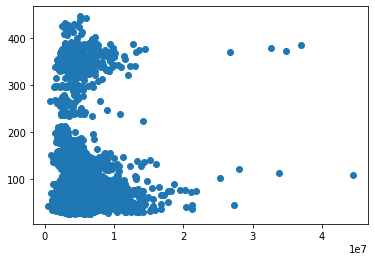

In [5]:
plt.scatter(df['volume'], df['open'])
plt.show()

In [6]:
query = """
    select *
    from td.options 
    where symbol = 'BA'
    """

options = utils.query_db(db_connection=utils.DW_STOCKS_JUPYTER, query=query)

In [7]:
options.head(1).T

,0
symbol,BA
volatility,29
n_contracts,1630
interest_rate,2.42788
put_call,CALL
description,BA Sep 6 2019 275 Call (Weekly)
exchange_name,OPR
bid,81.4
ask,81.9
last,54.75


In [8]:
current_stock_price=356.59
risk_free_rate = np.log(1.0242)

In [9]:
financial_utils.black_scholes(
    current_stock_price=current_stock_price,
    strike_price=275,
    risk_free_rate=risk_free_rate,
    time_to_maturity=2/365,
    volatility=1)

AttributeError: module 'scripts.utilities.financial_utils' has no attribute 'black_scholes'

In [10]:
financial_utils.BlackScholes(
    current_stock_price=current_stock_price,
    strike_price=275,
    risk_free_rate=risk_free_rate,
    time_to_maturity=(2/365),
    volatility=1
).option_price

81.62732223324923

In [12]:
financial_utils.BlackScholes(
    current_stock_price=current_stock_price,
    strike_price=275,
    risk_free_rate=risk_free_rate,
    time_to_maturity=(2/365),
    volatility=1
).theta

TypeError: append() takes exactly one argument (2 given)

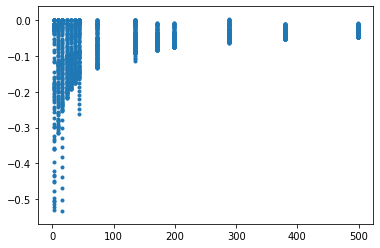

In [10]:
plt.scatter(options['days_to_expiration_date'], options['theta'], marker='.')
plt.show()